In [2]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import scipy
import pandas as pd
from tqdm import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams['savefig.dpi'] = 300
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath, amsfonts}"]

In [4]:
import torch
from torch import nn
import sbi
from sbi import utils as utils
from sbi.inference import likelihood_estimator_based_potential

In [5]:
from tools.catalog import Catalog
from tools.plot_tools import binned_plot
get_cen = lambda edges: np.array([(edges[i]+edges[i+1])/2. for i in range(len(edges)-1)])

# Andrea Flagship 2 data

In [6]:
data = pd.read_csv('data/raw/deep_all.dat', delimiter=' ', index_col=False,
                   skipinitialspace=True)
data = pd.DataFrame(data.iloc[1:,:-1].values, columns=data.columns[1:]).reset_index(drop=True)

/var/folders/_t/p68l7m6933b26j8g9wkcgq080000gp/T/ipykernel_39804/851058082.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/raw/deep_all.dat', delimiter=' ', index_col=False,


In [7]:
c = 2.99792458e5 # km/s
data['vwC50'] = c*(data['zwerr']-data['zwC50'])/(1+data['zwC50'])
data['vwC100'] = c*(data['zwerr']-data['zwC100'])/(1+data['zwC100'])
data['vdC50'] = c*(data['zwerr']-data['zdC50'])/(1+data['zwC50'])
data['vdC100'] = c*(data['zwerr']-data['zdC100'])/(1+data['zwC100'])

In [7]:
dirpath = 'data/processed/FS2wC50'
param_names = ['M200','r200']
data_names = ['x','y','vwC50']

# calculate mask 
mask = np.abs(data[data_names[-1]])<5000
mask *= data['fHa']>np.log10(2e-16)

ids = data.loc[mask,'Cl_id'].values.astype(int)
gals = data.loc[mask,data_names].values.astype('float64')
thetas = np.log10(data.loc[mask,param_names].values.astype('float64'))

# remove singles
unq, cnt = np.unique(ids, return_counts=True)
mask = np.isin(ids, unq[cnt>1])
ids, gals, thetas = ids[mask], gals[mask], thetas[mask]

# assign folds
unq = np.unique(ids)
folddict = pd.Series(np.random.choice(10, size=len(unq)), index=unq)
folds = folddict[ids].values

os.makedirs(dirpath, exist_ok=True)
np.save(join(dirpath, 'x.npy'), gals)
np.save(join(dirpath, 'theta.npy'), thetas)
np.save(join(dirpath, 'fold.npy'), folds)
np.save(join(dirpath, 'id.npy'), ids)

In [228]:
dirpath = 'data/processed/FS2wC100'
param_names = ['M200','r200']
data_names = ['x','y','vwC100']

# calculate mask 
mask = np.abs(data[data_names[-1]])<5000
mask *= data['fHa']>np.log10(2e-16)

ids = data.loc[mask,'Cl_id'].values.astype(int)
gals = data.loc[mask,data_names].values.astype('float64')
thetas = np.log10(data.loc[mask,param_names].values.astype('float64'))

# remove singles
unq, cnt = np.unique(ids, return_counts=True)
mask = np.isin(ids, unq[cnt>1])
ids, gals, thetas = ids[mask], gals[mask], thetas[mask]

# assign folds
unq = np.unique(ids)
folddict = pd.Series(np.random.choice(10, size=len(unq)), index=unq)
folds = folddict[ids].values

os.makedirs(dirpath, exist_ok=True)
np.save(join(dirpath, 'x.npy'), gals)
np.save(join(dirpath, 'theta.npy'), thetas)
np.save(join(dirpath, 'fold.npy'), folds)
np.save(join(dirpath, 'id.npy'), ids)

In [229]:
dirpath = 'data/processed/FS2dC50'
param_names = ['M200','r200']
data_names = ['x','y','vdC50']

# calculate mask 
mask = np.abs(data[data_names[-1]])<5000
mask *= data['fHa']>np.log10(6e-17)

ids = data.loc[mask,'Cl_id'].values.astype(int)
gals = data.loc[mask,data_names].values.astype('float64')
thetas = np.log10(data.loc[mask,param_names].values.astype('float64'))

# remove singles
unq, cnt = np.unique(ids, return_counts=True)
mask = np.isin(ids, unq[cnt>1])
ids, gals, thetas = ids[mask], gals[mask], thetas[mask]

# assign folds
unq = np.unique(ids)
folddict = pd.Series(np.random.choice(10, size=len(unq)), index=unq)
folds = folddict[ids].values

os.makedirs(dirpath, exist_ok=True)
np.save(join(dirpath, 'x.npy'), gals)
np.save(join(dirpath, 'theta.npy'), thetas)
np.save(join(dirpath, 'fold.npy'), folds)
np.save(join(dirpath, 'id.npy'), ids)

In [230]:
dirpath = 'data/processed/FS2dC100'
param_names = ['M200','r200']
data_names = ['x','y','vdC100']

# calculate mask 
mask = np.abs(data[data_names[-1]])<5000
mask *= data['fHa']>np.log10(6e-17)

ids = data.loc[mask,'Cl_id'].values.astype(int)
gals = data.loc[mask,data_names].values.astype('float64')
thetas = np.log10(data.loc[mask,param_names].values.astype('float64'))

# remove singles
unq, cnt = np.unique(ids, return_counts=True)
mask = np.isin(ids, unq[cnt>1])
ids, gals, thetas = ids[mask], gals[mask], thetas[mask]

# assign folds
unq = np.unique(ids)
folddict = pd.Series(np.random.choice(10, size=len(unq)), index=unq)
folds = folddict[ids].values

os.makedirs(dirpath, exist_ok=True)
np.save(join(dirpath, 'x.npy'), gals)
np.save(join(dirpath, 'theta.npy'), thetas)
np.save(join(dirpath, 'fold.npy'), folds)
np.save(join(dirpath, 'id.npy'), ids)

# Lorenzo's data

In [21]:
data = pd.read_csv('data/raw/TrainingSetMatt_NFW_gT.txt', delimiter='\t', 
                   index_col=False, header=None,
                   skiprows=2, on_bad_lines='skip',
                   skipinitialspace=True)
data = data.iloc[:,:-1]
x = 'x_pos y_pos  Rxy  vz  deltaR deltav(stat) deltav(syst) Clust_ID z  r200  M200  rs  rnu  beta1  beta0'
x = [y for y in x.split(' ') if y!='']
data.columns = x

# fix for now
data['y_pos'] = np.sqrt(data['Rxy']**2 - data['x_pos']**2) * np.random.choice([-1,1], size=len(data))


In [22]:
param_names = ['M200','rs']
data_names = ['x_pos','y_pos','vz']

gals = data.loc[:,data_names].values
thetas = data.loc[:,param_names].values
thetas[:,0] = np.log10(thetas[:,0])
ids = data.loc[:,'Clust_ID'].values

In [23]:
unq = np.unique(data['Clust_ID'])
folddict = pd.Series(np.random.choice(10, size=len(unq)), index=unq)
folds = folddict[data['Clust_ID']].values
print(len(unq))

6501


In [24]:
dirpath = 'data/processed/Lorenzo'
os.makedirs(dirpath, exist_ok=True)

np.save(join(dirpath, 'x.npy'), gals)
np.save(join(dirpath, 'theta.npy'), thetas)
np.save(join(dirpath, 'fold.npy'), folds)
np.save(join(dirpath, 'id.npy'), ids)

In [25]:
thetas.min(axis=0), thetas.max(axis=0)

(array([13.72631961,  0.1003    ]), array([14.62603225,  0.2801    ]))

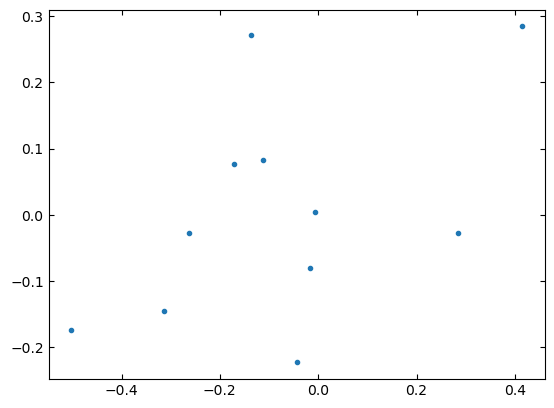

In [26]:
plt.plot(data.loc[:10, 'x_pos'], data.loc[:10, 'y_pos'],'.')

In [83]:
from scipy.stats import truncnorm

In [109]:
samps = truncnorm.rvs(-0.5,2, size=1000)

In [110]:
truncnorm.fit(samps, floc=0, f0=-0.5, f1=2)

(-0.5, 2, 0, 0.9998199462890617)

(array([1428., 1440., 1478., 1399., 1214., 1009.,  814.,  538.,  420.,
         260.]),
 array([-4.99648848e-01, -2.49788821e-01,  7.12061826e-05,  2.49931233e-01,
         4.99791260e-01,  7.49651287e-01,  9.99511314e-01,  1.24937134e+00,
         1.49923137e+00,  1.74909139e+00,  1.99895142e+00]),
 <BarContainer object of 10 artists>)

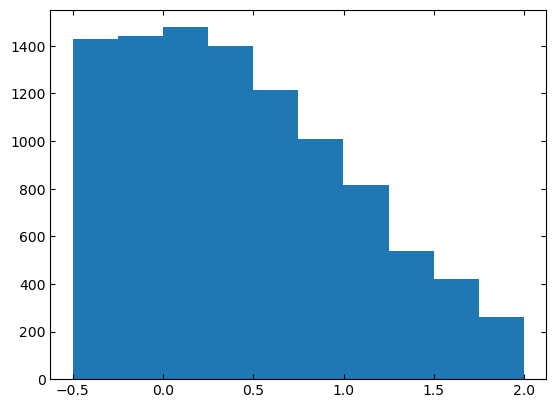

In [91]:
plt.hist(samps)

# Scratch

## Plot FS2

In [4]:
data = pd.read_csv('data/raw/deep_all.dat', delimiter=' ', index_col=False,
                   skipinitialspace=True)
data = pd.DataFrame(data.iloc[1:,:-1].values, columns=data.columns[1:]).reset_index(drop=True)

/var/folders/_t/p68l7m6933b26j8g9wkcgq080000gp/T/ipykernel_13530/851058082.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/raw/deep_all.dat', delimiter=' ', index_col=False,


In [5]:
c = 2.99792458e5 # km/s
data['vwC50'] = c*(data['zwerr']-data['zwC50'])/(1+data['zwC50'])
data['vwC100'] = c*(data['zwerr']-data['zwC100'])/(1+data['zwC100'])
data['vdC50'] = c*(data['zwerr']-data['zdC50'])/(1+data['zwC50'])
data['vdC100'] = c*(data['zwerr']-data['zdC100'])/(1+data['zwC100'])

In [10]:
np.sum(data['M']==1)/len(data)

0.08901759450422962

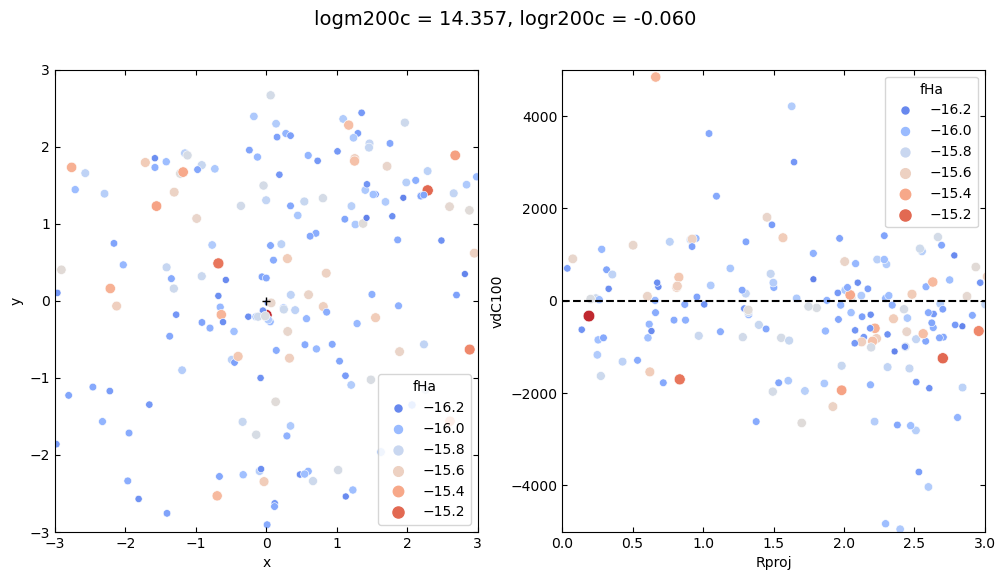

In [327]:
gby = data.groupby('Cl_id')

i = np.random.randint(1000)
idat = gby.get_group(i)

idat = idat[np.abs(idat['vdC100'])<5000]
idat['Rproj'] = np.sqrt(idat['x'].astype(float)**2+idat['y'].astype(float)**2)
norm = plt.Normalize(-16.4, -15)

f, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].plot(0,0,'k+')
g=sns.scatterplot(idat, x='x', y='y', hue='fHa', size='fHa', 
                  hue_norm=norm, size_norm=norm, palette='coolwarm', ax=axs[0])
axs[0].set_xlim(-3,3)
axs[0].set_ylim(-3,3)

axs[1].axhline(0, color='k', linestyle='--')
g=sns.scatterplot(idat, x='Rproj', y='vdC100', hue='fHa', size='fHa',
                  hue_norm=norm, size_norm=norm, palette='coolwarm', ax=axs[1])
axs[1].set_xlim(0,3)
axs[1].set_ylim(-5000,5000)

f.suptitle(f"logm200c = {np.log10(idat['M200'].iloc[0]):.3f}, logr200c = {np.log10(idat['r200'].iloc[0]):.3f}", fontsize=14)

f.savefig('images/ex_fs2_0.pdf', bbox_inches='tight')

In [316]:
idat

,x,y,zobs,zwerr,Hmag,fHa,M,C,Cl_id,xcl,...,zwC100,zdC50,zdC100,M200,r200,vwC50,vwC100,vdC50,vdC100,Rproj
113443,0.834,0.383,0.990721,0.9921,20.34,-15.072,0.0,0.05,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,844.972126,926.718047,1185.737809,1374.906006,0.917739
113444,1.431,1.049,0.980813,0.9817,22.95,-15.872,1.0,0.71,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-724.542092,-643.222935,-383.776409,-195.034976,1.774306
113445,0.523,-0.391,0.995478,0.9968,23.21,-16.158,0.0,0.96,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,1554.27182,1636.210606,1895.037503,2084.398566,0.653001
113446,-1.113,-0.053,0.990315,0.9918,21.28,-16.215,1.0,0.73,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,799.697677,881.431288,1140.46336,1329.619247,1.114261
113447,0.008,-0.108,0.982688,0.9822,22.12,-16.113,1.0,0.05,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-649.084678,-567.745003,-308.318995,-119.557044,0.108296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113812,-0.258,0.888,0.979293,0.9749,19.79,-15.608,1.0,0.51,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-1750.762927,-1669.722808,-1409.997244,-1221.534849,0.924720
113813,-0.274,0.431,0.986594,0.9863,19.93,-15.97,1.0,0.2,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-30.333881,51.174038,310.431803,499.361997,0.510722
113816,1.121,0.126,0.976309,0.974,22.53,-15.856,0.0,0.45,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-1886.586273,-1805.583086,-1545.82059,-1357.395126,1.128059
113817,0.779,-0.454,0.977667,0.9789,20.05,-15.529,0.0,0.16,435.0,0.0,...,0.985961,0.984243,0.982992,248300000000000.0,0.91,-1147.103612,-1065.899353,-806.337929,-617.711394,0.901641


In [273]:
np.log10(2e-16), np.log10(6e-17)

(-15.698970004336019, -16.221848749616356)

In [298]:
np.log10(2e-16)

-15.698970004336019

## Real Scratch